In [1]:
import os

import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from folium import Circle, Marker

# Data
https://www.kaggle.com/datasets/new-york-city/ny-2015-street-tree-census-tree-data

Street tree data 2015. Tree data collected includes tree species, diameter and perception of health.

In [2]:
def download_kaggle_dataset_if_not_exist(path_to_data_folder: str,
                                         file_name_with_data: str) -> None:
    """
    Download dataset from kaggle if it's not already exists in path_to_data folder with file_name name

    :param path_to_data_folder: path to folder with data
    :param file_name_with_data: name of file with data
    :return: None
    """
    # Check if the file exists in the folder
    file_path = os.path.join(path_to_data_folder, file_name_with_data)
    if not os.path.exists(file_path):
        # If not, download it
        try:
            !kaggle datasets download -d new-york-city/ny-2015-street-tree-census-tree-data -p $path_to_data --unzip
            print(f"Downloaded {file_name_with_data} from Kaggle")
        except Exception as e:
            print(f"Error downloading {file_name_with_data}: {str(e)}")
    else:
        print(f"{file_name_with_data} already exists")

In [3]:
path_to_data = os.path.join(os.path.dirname(os.getcwd()), 'dataset')
file_name = '2015-street-tree-census-tree-data.csv'
download_kaggle_dataset_if_not_exist(path_to_data, file_name)

2015-street-tree-census-tree-data.csv already exists


# EDA

In [4]:
df = pd.read_csv(f"{path_to_data}/{file_name}")

In [5]:
df.head()

tree_id  block_id               created_at  tree_dbh  stump_diam curb_loc  \
0   180683    348711  2015-08-27T00:00:00.000         3           0   OnCurb   
1   200540    315986  2015-09-03T00:00:00.000        21           0   OnCurb   
2   204026    218365  2015-09-05T00:00:00.000         3           0   OnCurb   
3   204337    217969  2015-09-05T00:00:00.000        10           0   OnCurb   
4   189565    223043  2015-08-30T00:00:00.000        21           0   OnCurb   

  status health                           spc_latin       spc_common  ...  \
0  Alive   Fair                         Acer rubrum        red maple  ...   
1  Alive   Fair                   Quercus palustris          pin oak  ...   
2  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust  ...   
3  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust  ...   
4  Alive   Good                     Tilia americana  American linden  ...   

   boro_ct     state   latitude  longitude         x_sp         y_sp  \
0  4073900  New York  40.723092 -73.844215  1027431.148  202756.7687   
1  4097300  New York  40.794111 -73.818679  1034455.701  228644.8374   
2  3044900  New York  40.717581 -73.936608  1001822.831  200716.8913   
3  3044900  New York  40.713537 -73.934456  1002420.358  199244.2531   
4  3016500  New York  40.666778 -73.975979   990913.775  182202.4260   

  council district census tract        bin           bbl  
0             29.0        739.0  4052307.0  4.022210e+09  
1             19.0        973.0  4101931.0  4.044750e+09  
2             34.0        449.0  3338310.0  3.028870e+09  
3             34.0        449.0  3338342.0  3.029250e+09  
4             39.0        165.0  3025654.0  3.010850e+09  

[5 rows x 45 columns]

In [6]:
df.describe()

tree_id       block_id       tree_dbh     stump_diam  \
count  683788.000000  683788.000000  683788.000000  683788.000000   
mean   365205.011085  313793.096236      11.279787       0.432463   
std    208122.092902  114839.024312       8.723042       3.290241   
min         3.000000  100002.000000       0.000000       0.000000   
25%    186582.750000  221556.000000       4.000000       0.000000   
50%    366214.500000  319967.000000       9.000000       0.000000   
75%    546170.250000  404624.000000      16.000000       0.000000   
max    722694.000000  999999.000000     450.000000     140.000000   

            postcode  community board       borocode       cncldist  \
count  683788.000000    683788.000000  683788.000000  683788.000000   
mean    10916.246044       343.505404       3.358500      29.943181   
std       651.553364       115.740601       1.166746      14.328531   
min        83.000000       101.000000       1.000000       1.000000   
25%     10451.000000       302.000000       3.000000      19.000000   
50%     11214.000000       402.000000       4.000000      30.000000   
75%     11365.000000       412.000000       4.000000      43.000000   
max     11697.000000       503.000000       5.000000      51.000000   

            st_assem      st_senate       boro_ct       latitude  \
count  683788.000000  683788.000000  6.837880e+05  683788.000000   
mean       50.791583      20.615781  3.404914e+06      40.701261   
std        18.966520       7.390844  1.175863e+06       0.090311   
min        23.000000      10.000000  1.000201e+06      40.498466   
25%        33.000000      14.000000  3.011700e+06      40.631928   
50%        52.000000      21.000000  4.008100e+06      40.700612   
75%        64.000000      25.000000  4.103202e+06      40.762228   
max        87.000000      36.000000  5.032300e+06      40.912918   

           longitude          x_sp           y_sp  council district  \
count  683788.000000  6.837880e+05  683788.000000     677269.000000   
mean      -73.924060  1.005280e+06  194798.424625         30.027330   
std         0.123583  3.428505e+04   32902.061114         14.301717   
min       -74.254965  9.133493e+05  120973.792200          1.000000   
25%       -73.980500  9.896578e+05  169515.153700         19.000000   
50%       -73.912911  1.008386e+06  194560.252500         30.000000   
75%       -73.834910  1.029991e+06  217019.571950         43.000000   
max       -73.700488  1.067248e+06  271894.092100         51.000000   

        census tract           bin           bbl  
count  677269.000000  6.742290e+05  6.742290e+05  
mean    11957.368422  3.495439e+06  3.413414e+09  
std     30745.739811  1.193275e+06  1.174892e+09  
min         1.000000  1.000000e+06  0.000000e+00  
25%       202.000000  3.031991e+06  3.011240e+09  
50%       516.000000  4.020352e+06  4.008560e+09  
75%      1417.000000  4.263123e+06  4.105700e+09  
max    157903.000000  5.515124e+06  5.080500e+09

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           164350 non-null  object 
 11  guards            79866 non-null   object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          225844 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [8]:
df.shape

(683788, 45)

### replace object data to other types

many data in object format, let's see what we can do with it

In [9]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [10]:
df['curb_loc'].value_counts()

curb_loc
OnCurb            656896
OffsetFromCurb     26892
Name: count, dtype: int64

we can replace this with binary feature:
- 1: OnCurb
- 0: OffsetFromCurb

In [11]:
df['curb_loc'] = (df['curb_loc'] == 'OnCurb') * 1

In [12]:
df['sidewalk'].value_counts(dropna=False)

sidewalk
NoDamage    464978
Damage      187194
NaN          31616
Name: count, dtype: int64

we can replace this with binary feature:
- 1: Damage
- 0: NoDamage

In [13]:
df['sidewalk'] = np.where(df['sidewalk'] == 'Damage', 1,
                          np.where(df['sidewalk'] == 'NoDamage', 0, np.nan))

Features that we can replace this with binary feature:
- 1: Yes
- 0: No

In [14]:
df['root_stone'].value_counts(dropna=False)

root_stone
No     543789
Yes    139999
Name: count, dtype: int64

In [15]:
df['root_stone'] = (df['root_stone'] == 'Yes') * 1

In [16]:
df['root_grate'].value_counts(dropna=False)

root_grate
No     680252
Yes      3536
Name: count, dtype: int64

In [17]:
df['root_grate'] = (df['root_grate'] == 'Yes') * 1

In [18]:
df['root_other'].value_counts(dropna=False)

root_other
No     653466
Yes     30322
Name: count, dtype: int64

In [19]:
df['root_other'] = (df['root_other'] == 'Yes') * 1

In [20]:
df['trunk_wire'].value_counts(dropna=False)

trunk_wire
No     670514
Yes     13274
Name: count, dtype: int64

In [21]:
df['trunk_wire'] = (df['trunk_wire'] == 'Yes') * 1

In [22]:
df['trnk_light'].value_counts(dropna=False)

trnk_light
No     682757
Yes      1031
Name: count, dtype: int64

In [23]:
df['trnk_light'] = (df['trnk_light'] == 'Yes') * 1

In [24]:
df['trnk_other'].value_counts(dropna=False)

trnk_other
No     651215
Yes     32573
Name: count, dtype: int64

In [25]:
df['trnk_other'] = (df['trnk_other'] == 'Yes') * 1

In [26]:
df['brch_light'].value_counts(dropna=False)

brch_light
No     621423
Yes     62365
Name: count, dtype: int64

In [27]:
df['brch_light'] = (df['brch_light'] == 'Yes') * 1

In [28]:
df['brch_shoe'].value_counts(dropna=False)

brch_shoe
No     683377
Yes       411
Name: count, dtype: int64

In [29]:
df['brch_shoe'] = (df['brch_shoe'] == 'Yes') * 1

In [30]:
df['brch_other'].value_counts(dropna=False)

brch_other
No     659433
Yes     24355
Name: count, dtype: int64

In [31]:
df['brch_other'] = (df['brch_other'] == 'Yes') * 1

Other features:

In [32]:
df['state'].value_counts(dropna=False)

state
New York    683788
Name: count, dtype: int64

we can drop this feature because it's not informative

In [33]:
df.drop(['state'], axis=1, inplace=True)

### missing values

we have some columns with missing values

In [34]:
missing_percentages = (df.isnull().mean() * 100).round(2)
missing_columns = missing_percentages[missing_percentages > 0]

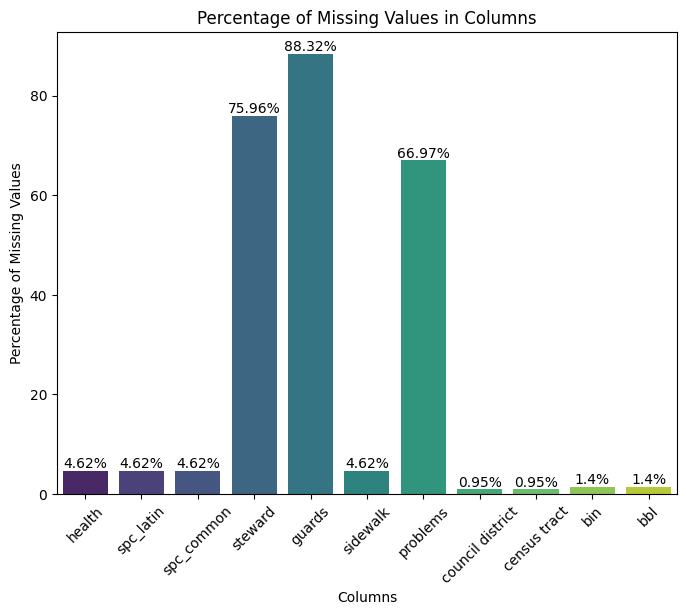

In [35]:
plt.figure(figsize=(8, 6))
plt.title('Percentage of Missing Values in Columns')
sns.barplot(x=missing_columns.index, y=missing_columns.values, palette='viridis', hue=missing_columns.index)
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
for index, value in enumerate(missing_columns):
    plt.text(index, value, f'{value}%', ha='center', va='bottom')
plt.show()

In [36]:
df[['steward', 'guards', 'problems']].dropna().head()

steward   guards                          problems
13    3or4  Harmful                         RootOther
19    1or2  Helpful                            Stones
21    1or2   Unsure  RootOther,TrunkOther,BranchOther
26    1or2  Helpful               Stones,BranchLights
32    1or2   Unsure            MetalGrates,TrunkOther

The most missing values from steward, guards and problems. Seems that this data was really hard to collect.

### distribution of features

In [37]:
cat_cols = ['status', 'health', 'spc_latin', 'spc_common', 'steward',
            'guards', 'user_type', 'problems', 'address', 'zip_city', 
            'borough','nta', 'nta_name']
num_cols = ['tree_id', 'block_id','tree_dbh', 'stump_diam','curb_loc',
            'sidewalk','root_stone','root_grate', 'root_other', 'trunk_wire', 
            'trnk_light', 'trnk_other','brch_light', 'brch_shoe', 'brch_other',
            'postcode','community board', 'borocode','cncldist','st_assem', 
            'st_senate','boro_ct','latitude','longitude', 'x_sp', 'y_sp', 'council district', 
            'census tract', 'bin','bbl']
other_cols = ['created_at',]

let's look at the distribution of numerical features

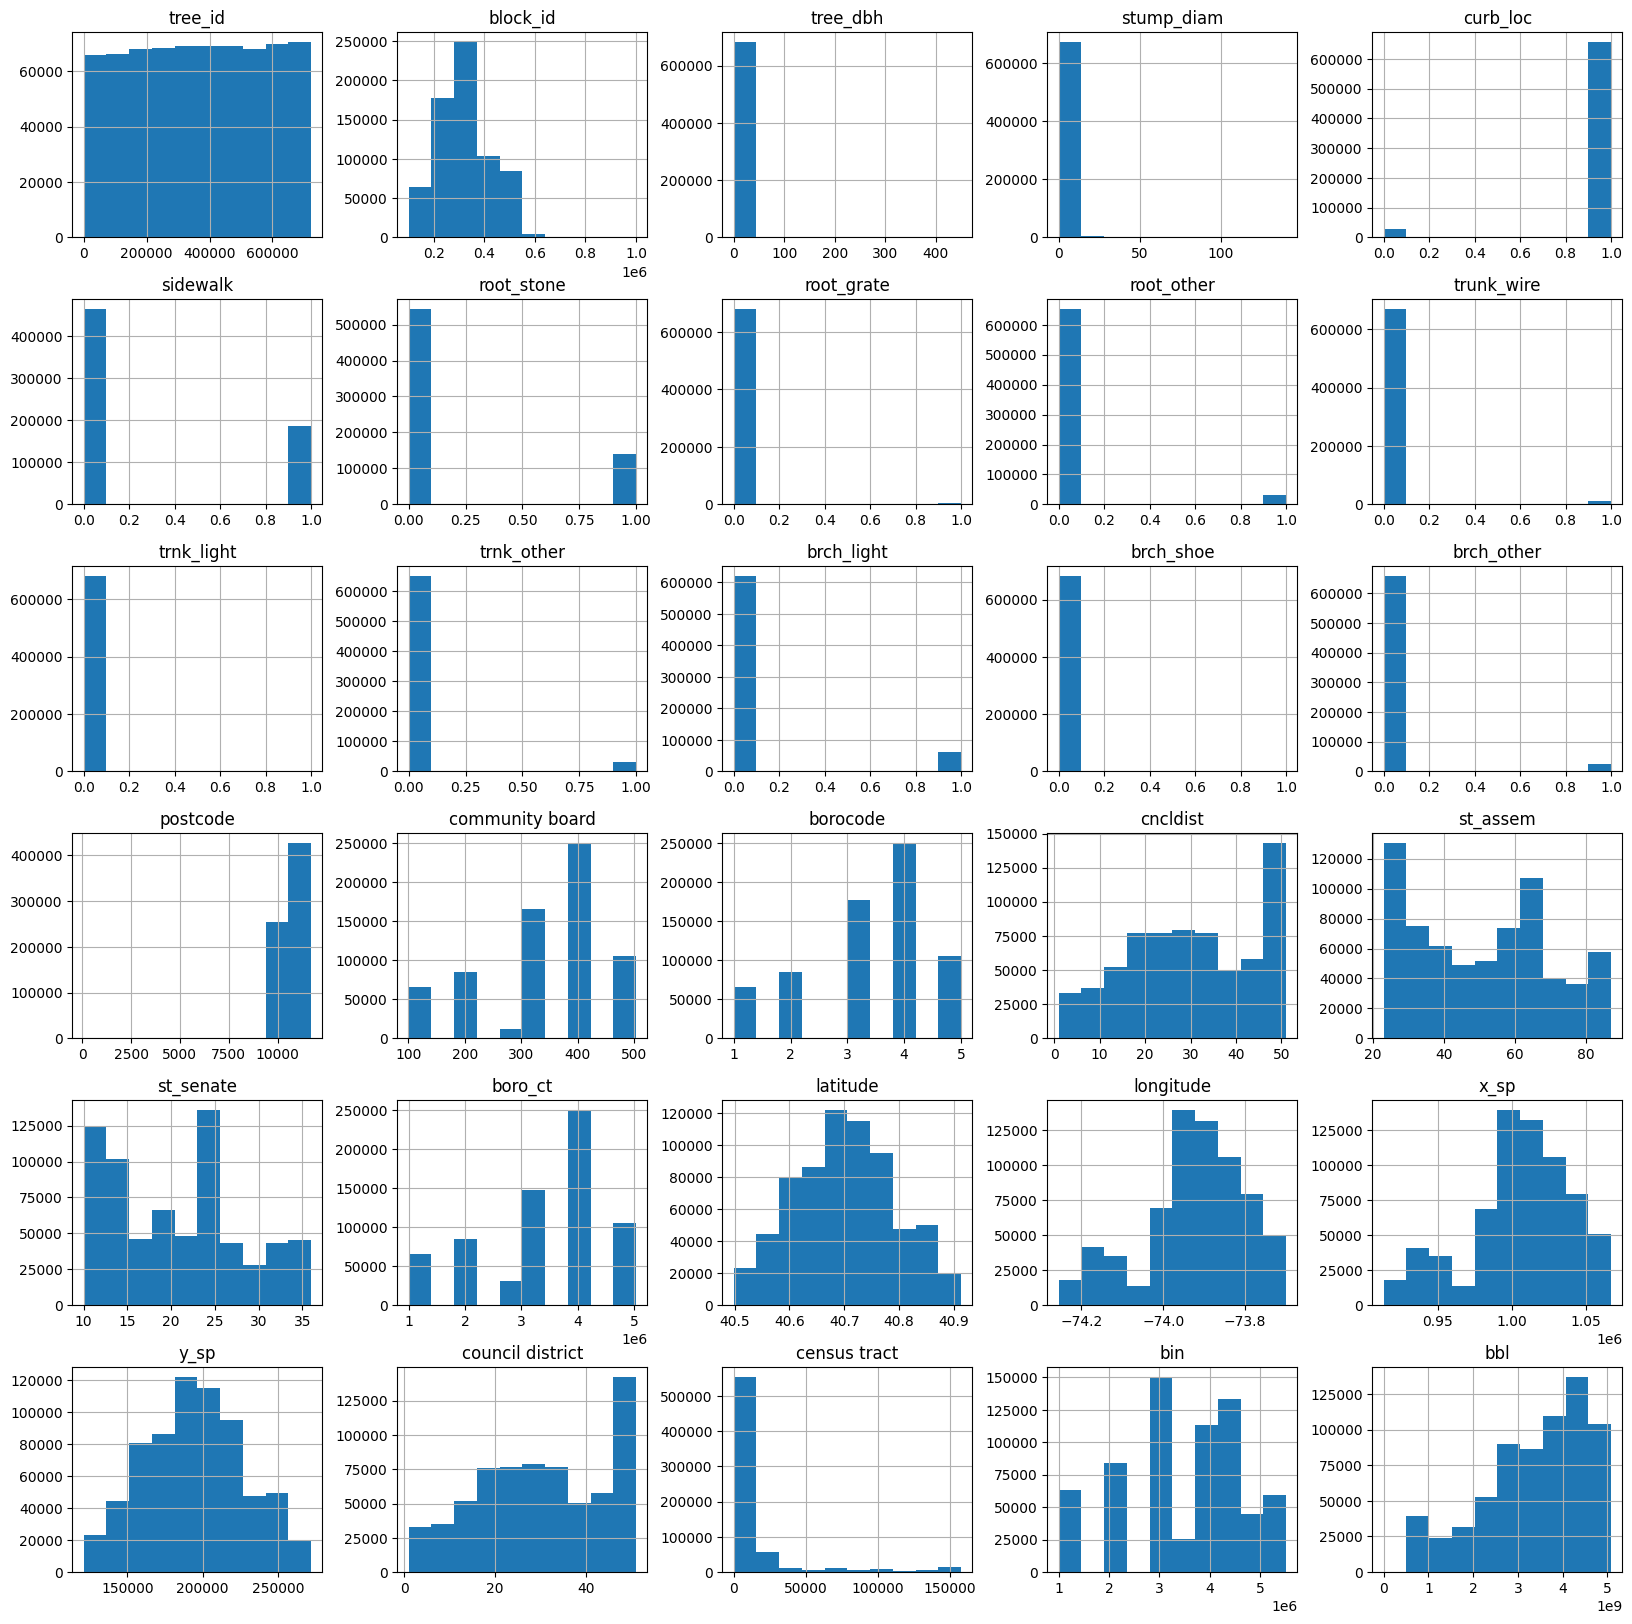

In [38]:
df[num_cols].hist(figsize=(20, 20));

Insights:   
- 'tree_dbh': Diameter at breast height of tree can have rare big values 
- 'stump_diam': Diameter of stump can have rare big values, a lot of values is 0
- 'curb_loc': most trees are along the curb
- 'root_grate': there are small amount of root problems caused by metal grates
- 'root_other': there are small amount of other root problems
- 'trunk_wire': there are small amount of any trunk problems
- 'brch_light': there are small amount of any branch problems

let's look at the distribution of date features

In [39]:
plt.figure(figsize=(200, 30))
df['created_at'].value_counts().sort_index().plot(kind='bar')
plt.tight_layout();

In [40]:
df['created_at'].describe()

count                           683788
mean     2015-12-06 07:18:59.574254592
min                2015-05-19 00:00:00
25%                2015-08-29 00:00:00
50%                2015-10-23 00:00:00
75%                2016-02-06 00:00:00
max                2016-10-05 00:00:00
Name: created_at, dtype: object

data from May 2015 till october 2016 with small amount of values from 01-2016 to 04-2016

let's look at the distribution of categorical features (draw only features with small amount of values)

In [41]:
draw_cols = ['status','health','steward','guards','user_type','borough',]

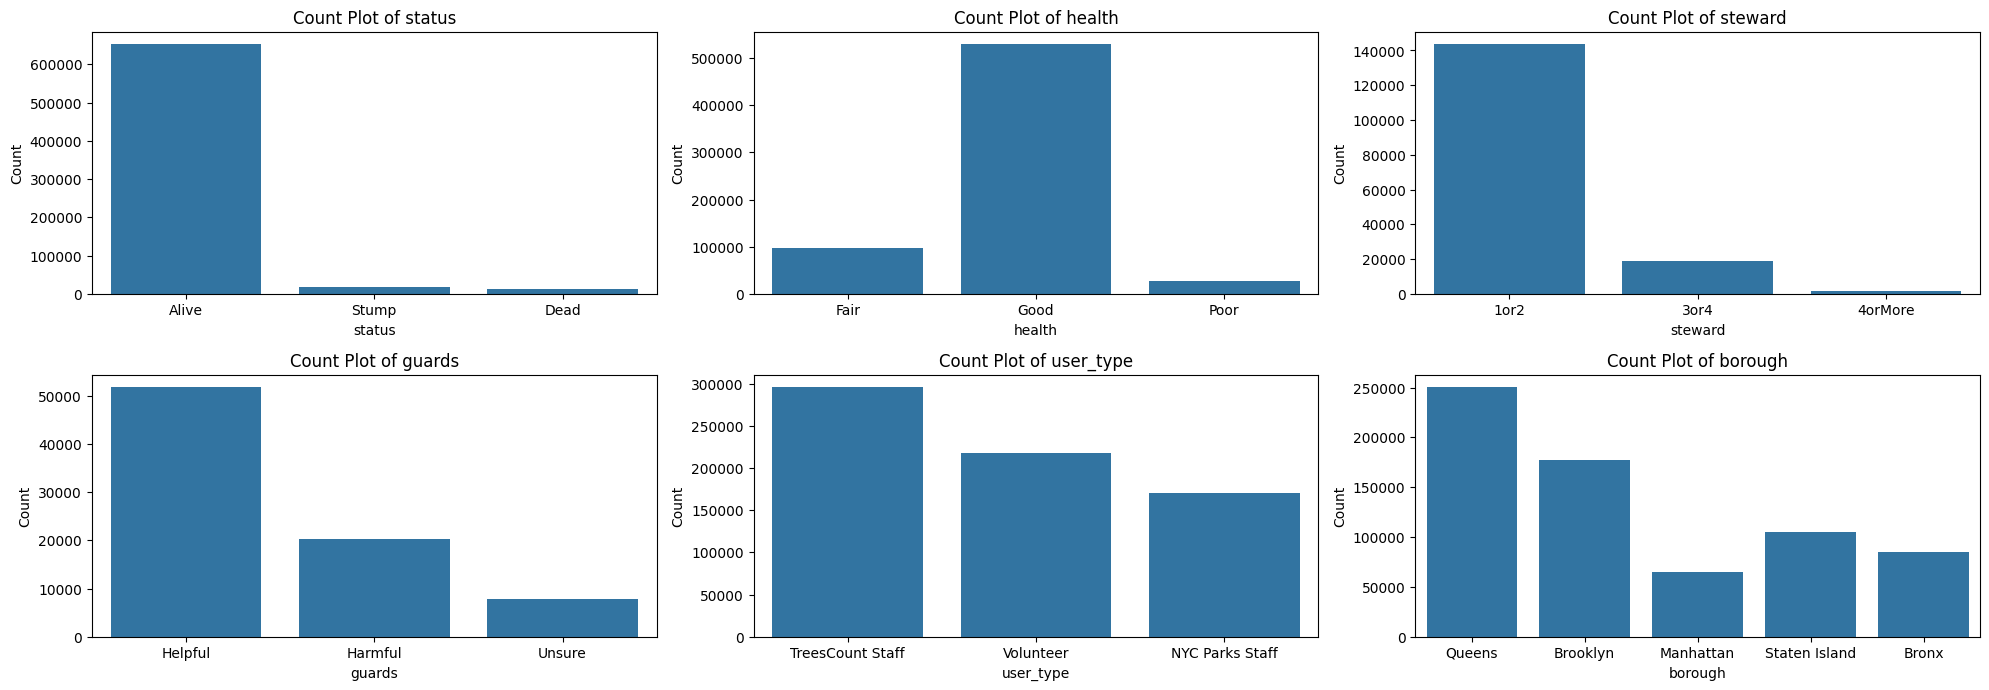

In [42]:
plt.figure(figsize=(20, 10)) 

for i, col in enumerate(draw_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {col}')


plt.tight_layout()

plt.show()

Insights:
- most problems is stones
- most data from Brooklyn
- most trees alive with good health, 1 or 2 stewards, with helpful guards

### pairwise distribution

draw pairplots for interesting columns (for all columns it's too long and not informative for geocoded columns)

- 'tree_dbh': Diameter at breast height of tree
- 'stump_diam': Diameter of stump
- 'curb_loc': trees are along the curb or not
- 'status': tree is alive, standing dead, or a stump
- 'health': tree health
- 'spc_common': Common name for species
- 'steward': Number of signs of stewardship observed
- 'guards': type of tree guard
- 'sidewalk': Sidewalk damage
- 'user_type': Category of user who collected this tree point
- 'problems'
- 'root_stone': Root problems caused by paving stones in the tree bed
- 'root_grate': Root problems caused by metal grates
- 'root_other': other root problems
- 'trunk_wire': Trunk problems caused by rope or wires
- 'trnk_light': Trunk problems caused by lights
- 'trnk_other': other trunk problems
- 'brch_light': Branch problems caused by lights or wires
- 'brch_shoe': Branch problems caused by shoes
- 'brch_other': other branch problems
- 'zip_city'
- 'borough'

Let's look connection of tree status by borough:

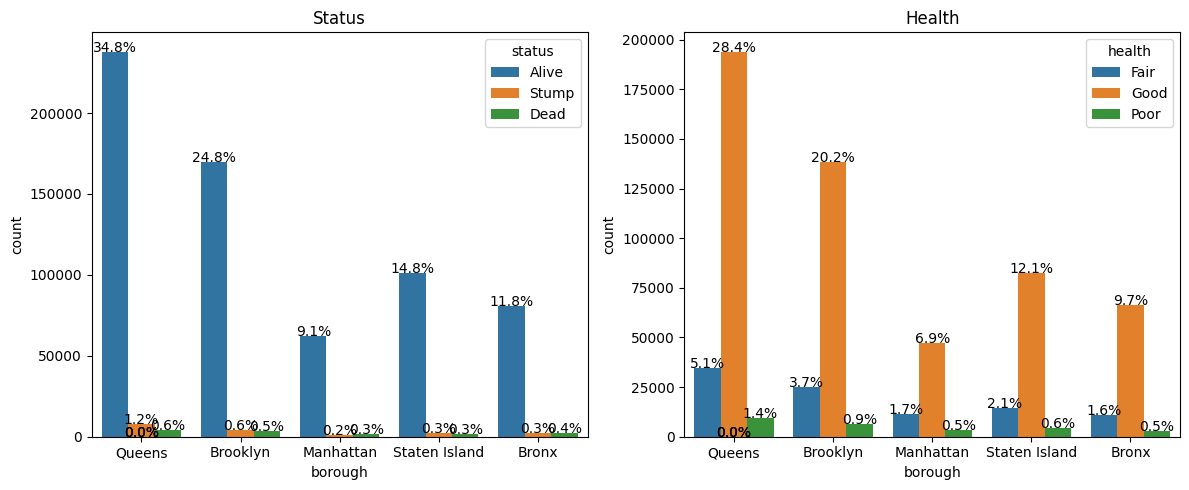

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ax1 = sns.countplot(x='borough', hue='status', data=df, ax=axs[0])
total1 = float(len(df))
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total1) * 100), ha="center")
axs[0].set_title('Status')

ax2 = sns.countplot(x='borough', hue='health', data=df, ax=axs[1])
total2 = float(len(df))
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total2) * 100), ha="center")
axs[1].set_title('Health')

plt.tight_layout()
plt.show()

Distribution of good and bad trees has similar trends as total amount of them by each borough. Seems that all boroughs were tried to serve well the trees in area.

Let's look at different problems by boroughs:

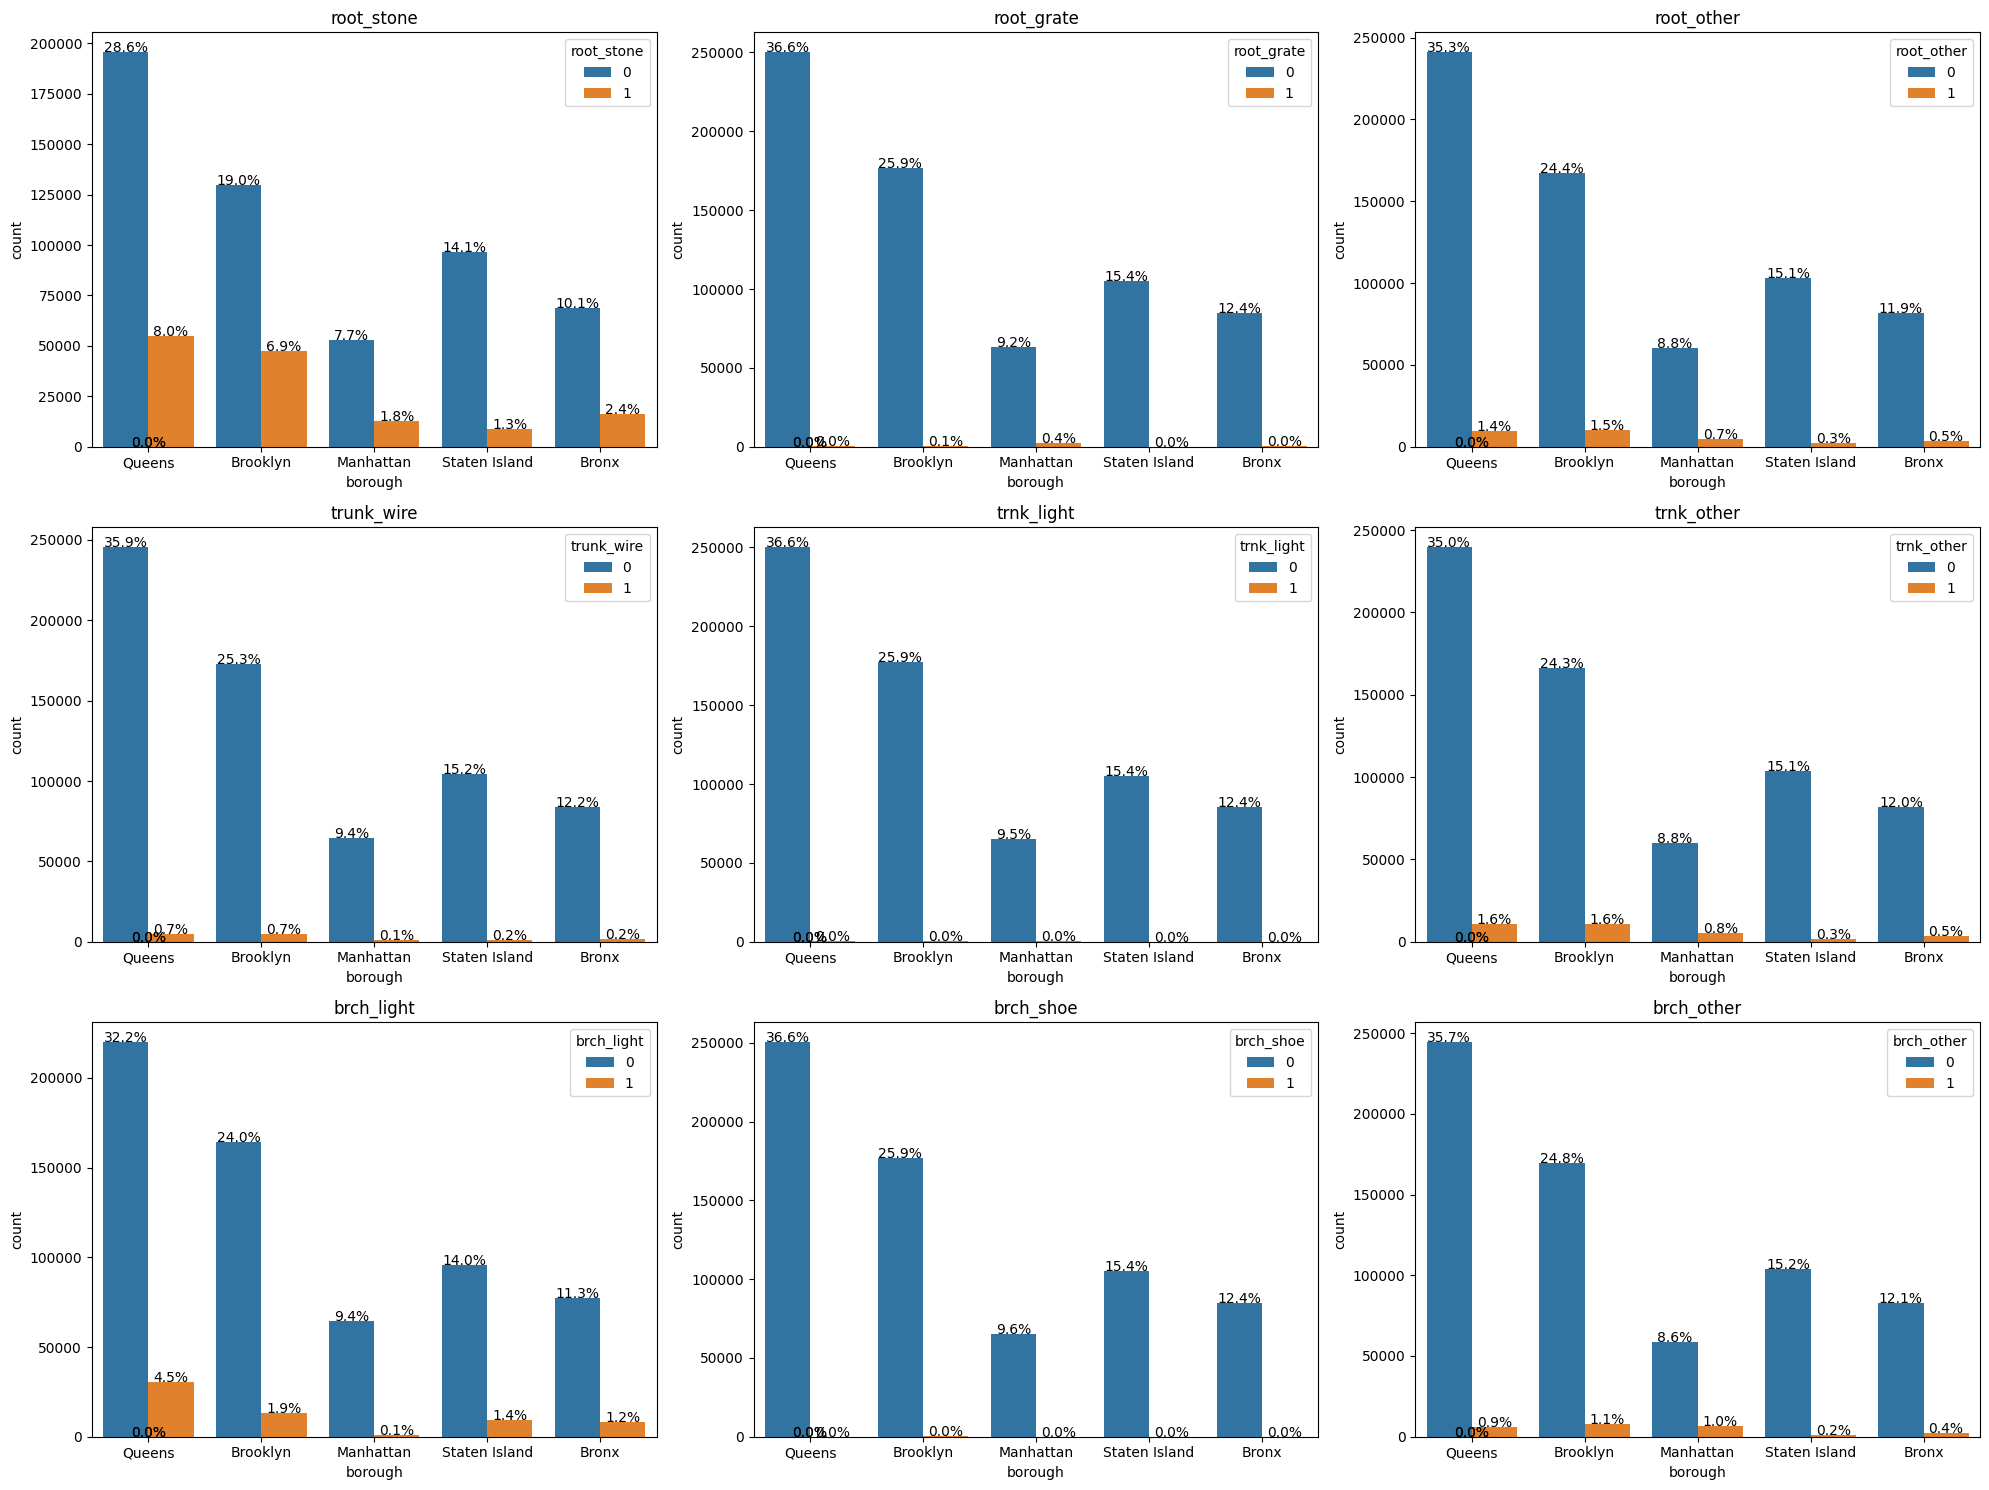

In [44]:
hue_columns = ['root_stone','root_grate', 'root_other', 
               'trunk_wire', 'trnk_light', 'trnk_other',
               'brch_light', 'brch_shoe', 'brch_other']

fig, axs = plt.subplots(3, 3, figsize=(20, 15))
axs = axs.flatten()

for i, hue_col in enumerate(hue_columns):
    ax = axs[i]
    sns.countplot(x='borough', hue=hue_col, data=df, ax=ax)
    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")
    
    ax.set_title(hue_col)

plt.tight_layout()
plt.show()

There are a lot of problems with stones, trunks and branches in Brooklyn and Queens, problems with metal grates in Manhattan, but small amount of problems with branch.

Let's look at connections of diameter of tree, and it's health:

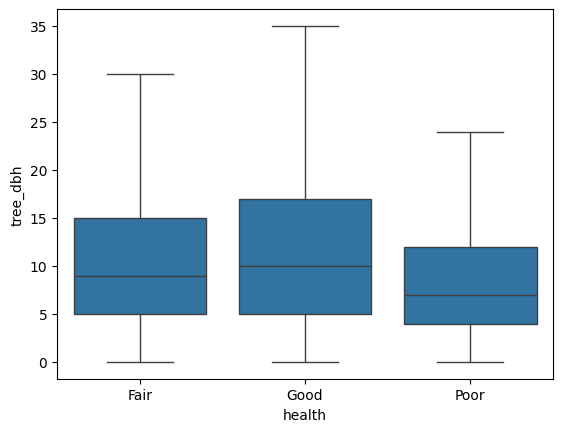

In [45]:
sns.boxplot(x='health', y='tree_dbh', data=df, showfliers=False);

we can notice that than less diameter of tree than less health tree has

Let's look on top species with good and bad health:

In [46]:
tmp = df.groupby(['spc_common', 'health']).size().reset_index()
tmp2 = tmp.groupby(['spc_common'])[0].sum().reset_index()
tmp2.columns = ['spc_common', 'sum']
tmp = tmp.merge(tmp2, on=['spc_common'])
tmp['mean'] = tmp[0] / tmp['sum']

top10 = tmp[tmp['health'] == 'Good'].sort_values('mean').tail(10)
bot10 = tmp[tmp['health'] == 'Poor'].sort_values('mean').tail(10)

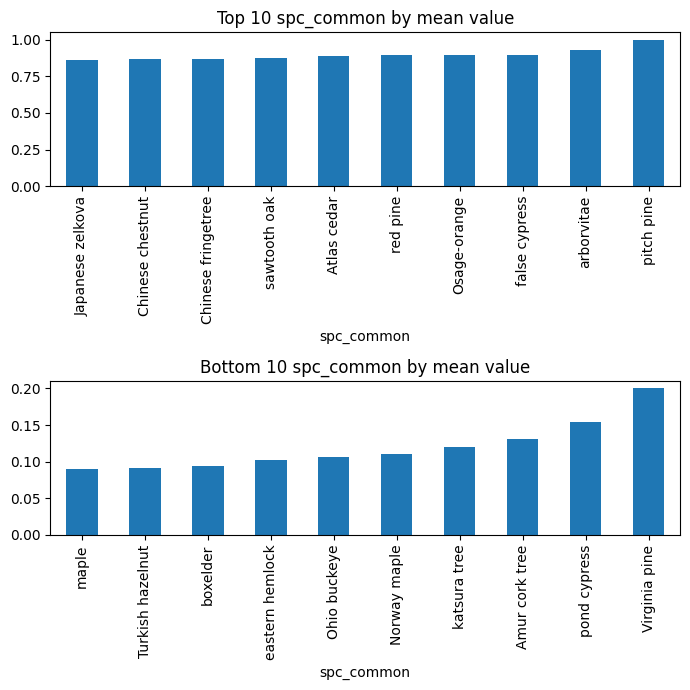

In [47]:
fig, axs = plt.subplots(2, 1, figsize=(7, 7))

top10[['spc_common','mean']].plot(kind='bar', x='spc_common', ax=axs[0], legend=False)
axs[0].set_title('Top 10 spc_common by mean value')

bot10[['spc_common','mean']].plot(kind='bar', x='spc_common', ax=axs[1], legend=False)
axs[1].set_title('Bottom 10 spc_common by mean value')

plt.tight_layout()
plt.show()

The most mean value of the healthiest trees is pitch pine and the smallest mean value of the healthiest trees is maple.

### correlations

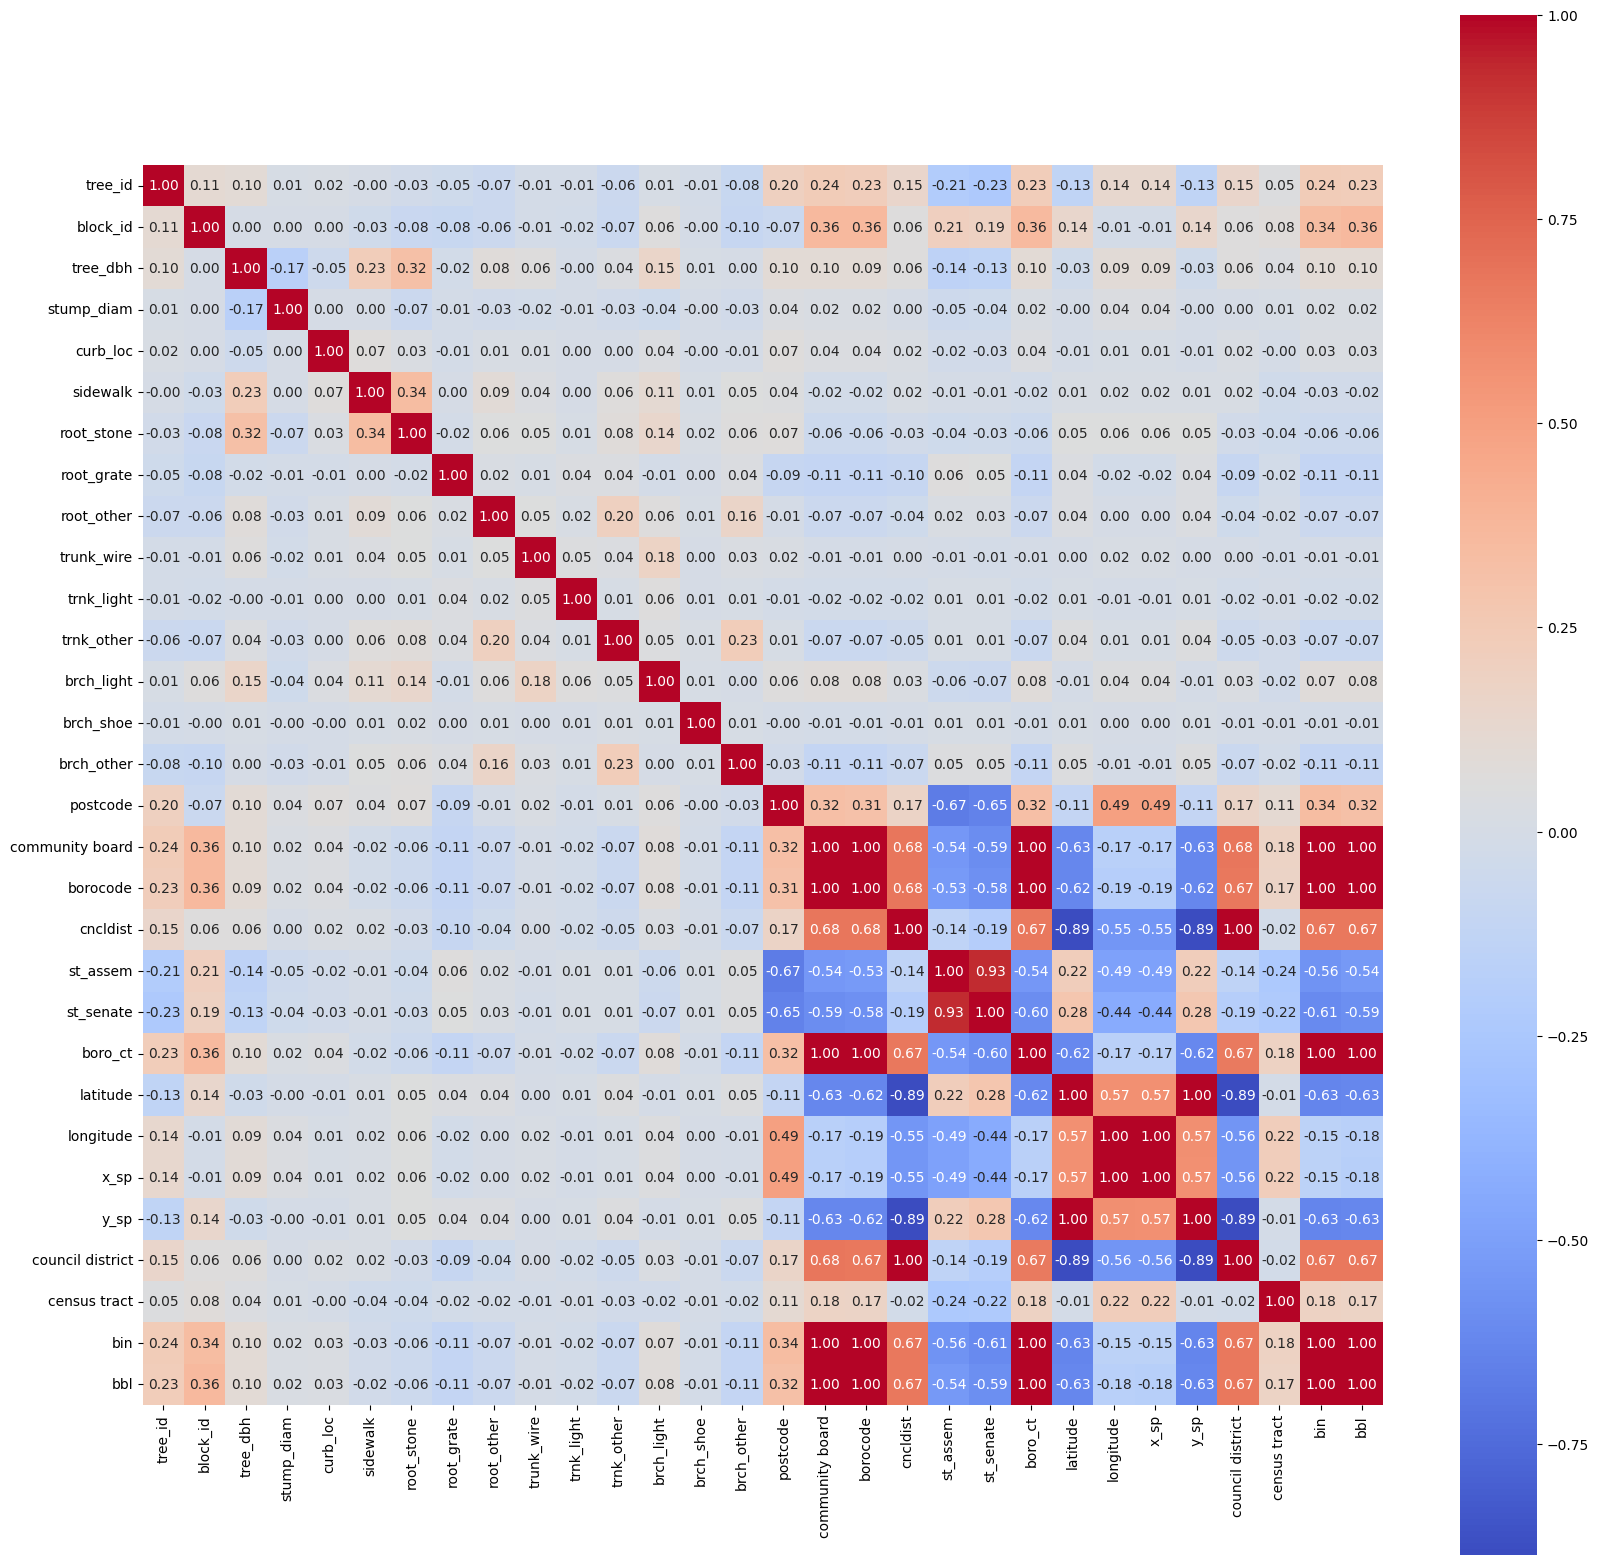

In [48]:
plt.figure(figsize=(20, 20)) 
corr_matrix = df[num_cols].corr().fillna(0)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True);

We can see that diameter at breast height of tree 'tree_dbh' has correlation with sidewalk damage and root problems - interesting thing that it's positive, that mean that than bigger diameter than more problems around tree - maybe because tree was trying to be alive and trees that cannot do that was dead - we can notice that with negative correlation with stump diameter. Also, sidewalk damage and root problems has positive correlation that means that these problems often happen together and sidewalk damage can influence on future root problems.
Other root problems and other trunk problems and other branch problems have positive correlation and also can happen together because of union damage from something.  
Branch problems caused by lights or wires 'brch_light' have positive correlation with trunk problems caused by rope or wires 'trunk_wire', so both of them have problems because of union wires problems.

### geo data

In [49]:
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
# Set the coordinate reference system (CRS) to EPSG 4326
df.crs = 'epsg:4326'

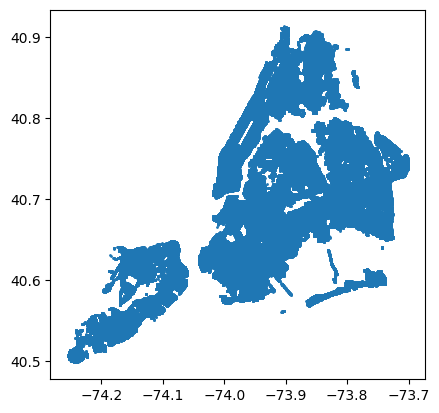

In [50]:
df.plot(markersize=1);

In [51]:
# show 1000 values
m_2 = folium.Map(location=[40.70,-73.92], zoom_start=11)

for idx, row in df.head(1000).iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m_2)
m_2

Let's look on location of health and not health trees on the map; values are too much, let's show random 10000

In [52]:
tmp = df.sample(10000, random_state=42)

In [54]:
m_4 = folium.Map(location=[40.70,-73.92], tiles='cartodbpositron', zoom_start=11)

def color_producer(health):
    if health == 'Good':
        return 'forestgreen'
    elif health == 'Fair':
        return 'darkorange'
    else:
        return 'darkred'

# Add a bubble map to the base map
for i in range(0,len(tmp)):
    Circle(
        location=[tmp.iloc[i]['latitude'], tmp.iloc[i]['longitude']],
        radius=20,
        color=color_producer(tmp.iloc[i]['health'])).add_to(m_4)

m_4

We can notice that trees with bad health can stay close to each other like 3-4 trees with bad health together. And trees with health closer to bad also stayed near the trees with bad health

We can say that most trees with bad health or died have combination of different problems around them, like roots, trunks and branches and on this has influence by damaged sidewalks. Most trees are good and healthy in all represented borough in NY. Manhattan and Bronx boroughs has the least amount of trees and the greenest borough is Queens - it's better to live in this borough if you need to live in NY.